<a href="https://colab.research.google.com/github/sanjxnaa/Digit-Recognizer-Using-CNN/blob/main/digits_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sujeeth117","key":"e0c325d4843980a635628f34730cab63"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                           title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                                9MB  2023-03-20 15:43:25           3400        130  1.0              
ashishraut64/global-methane-emissions                         Global Emissions.                                 31KB  2023-03-27 09:02:51            817         30  1.0              
thitiwat/top-100-most-expensive-football-transfers            ⚽ Top 100 most expensive football transfers        2KB  2023-03-27 04:06:28            549         23  1.0              
davidms8/product-sales-detail                                 Product Sales - Detail 

In [ ]:
!kaggle competitions download -c digit-recognizer

 72% 11.0M/15.3M [00:00<00:00, 20.3MB/s]
100% 15.3M/15.3M [00:00<00:00, 17.1MB/s]


In [ ]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.optimizers import RMSprop, Adam, SGD
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
%matplotlib inline

## **DIGIT RECOGNITION: THE DATA PREPARATION**

In [ ]:
# Load the data
train = pd.read_csv("/content/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(42000, 785)

In [ ]:
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

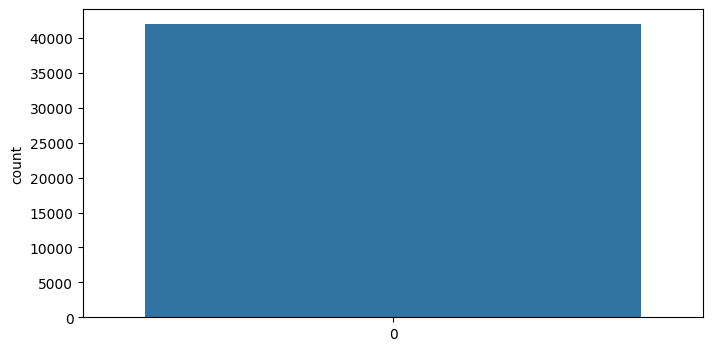

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(train['label'])
plt.show()

In [ ]:
x_train = train.drop(labels = ['label'], axis=1)
x_train.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train['label']
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

#DIGIT RECOGNITION: DATA PREPROCESSING

In [ ]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_train = x_train / 255.0

In [ ]:
y_train = to_categorical(y_train, num_classes=10)


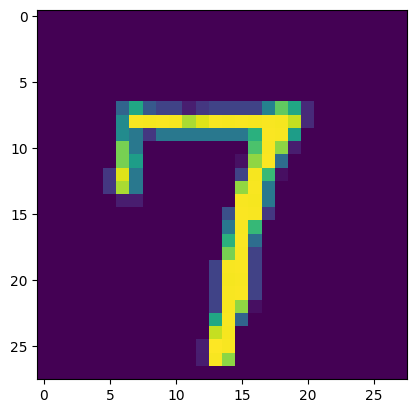

In [ ]:
plt.imshow(x_train[6][:,:,0])
plt.show()

In [ ]:
y_train[5]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#DIGIT RECOGNITION: MODEL BUILDING


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='ELU', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='ELU'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='ELU'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='ELU'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = "ELU"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [ ]:
model.compile(optimizer = 'RMSprop' , loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
epochs=20
batch_size=64
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)

Epoch 1/20
657/657 [==============================] - 17s 7ms/step - loss: 0.2603 - accuracy: 0.9188
Epoch 2/20
657/657 [==============================] - 7s 10ms/step - loss: 0.1392 - accuracy: 0.9605
Epoch 3/20
657/657 [==============================] - 6s 10ms/step - loss: 0.1191 - accuracy: 0.9671
Epoch 4/20
657/657 [==============================] - 7s 11ms/step - loss: 0.1041 - accuracy: 0.9705
Epoch 5/20
657/657 [==============================] - 5s 7ms/step - loss: 0.0982 - accuracy: 0.9732
Epoch 6/20
657/657 [==============================] - 5s 7ms/step - loss: 0.0954 - accuracy: 0.9738
Epoch 7/20
657/657 [==============================] - 5s 7ms/step - loss: 0.0913 - accuracy: 0.9749
Epoch 8/20
657/657 [==============================] - 5s 7ms/step - loss: 0.0901 - accuracy: 0.9767
Epoch 9/20
657/657 [==============================] - 5s 7ms/step - loss: 0.0928 - accuracy: 0.9759
Epoch 10/20
657/657 [==============================] - 5s 7ms/step - loss: 0.0862 - accuracy: 0.

In [ ]:
epochs=30
batch_size=40
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)

Epoch 1/30
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0997 - accuracy: 0.9786
Epoch 2/30
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0982 - accuracy: 0.9786
Epoch 3/30
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1057 - accuracy: 0.9778
Epoch 4/30
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1053 - accuracy: 0.9780
Epoch 5/30
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1043 - accuracy: 0.9781
Epoch 6/30
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1041 - accuracy: 0.9793
Epoch 7/30
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1101 - accuracy: 0.9783
Epoch 8/30
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1040 - accuracy: 0.9800
Epoch 9/30
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1082 - accuracy: 0.9797
Epoch 10/30
1050/1050 [==============================] - 6s 6ms/step - loss: 0.113

In [ ]:
test= pd.read_csv('/content/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test = test.values.reshape(-1, 28, 28, 1)
x_test = x_test / 255.0

In [ ]:
y_test=model.predict(x_test)

875/875 [==============================] - 2s 2ms/step


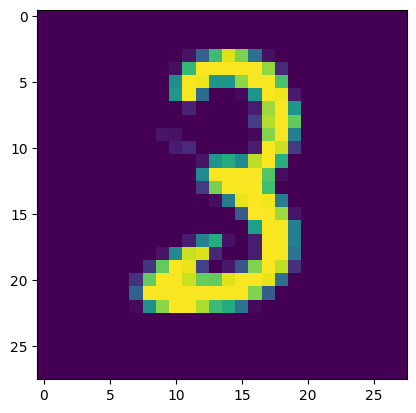

In [ ]:
plt.imshow(x_test[4][:,:,0])
plt.show()

In [ ]:
y_test[4]

array([1.2794256e-13, 5.9745020e-10, 8.8103370e-08, 9.9999976e-01,
       4.2415835e-11, 6.6821663e-08, 9.1181290e-10, 2.0222153e-10,
       6.5280301e-09, 8.5040247e-10], dtype=float32)

In [ ]:
y_test=[np.argmax(y_test1) for y_test1 in y_test]

In [ ]:
y_test[4]

3

# Create Submission file

In [ ]:
submission = pd.DataFrame({'ImageId' : [i+1 for i in range(len(y_test))] , 'Label' : y_test})

In [ ]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
submission.to_csv('/content/submission.csv', index = False)